In [57]:
%matplotlib inline
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from ssl_agent.ssl_agent import SSLAgent
from lib.dataset_wrapper import Dataset
import torch
import pandas as pd
import scipy

agent_folder = Path('../out/ssl_agent/cosine')
def compute_art_pcc(agent_path):
    save_path = agent_path / 'results' / 'test_pcc.csv'
    save_path.parent.mkdir(exist_ok=True)

    if not save_path.is_file():
        agent = SSLAgent.reload(str(agent_path))
        labels = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
        dataset_name = agent.config['dataset']['name']
        dataset = Dataset(dataset_name)
        items_name = agent.datasplits[2]
        items_sound = dataset.get_items_data(agent.config['dataset']['sound_type'], cut_silences=True, format='.wav')
        items_source = dataset.get_items_data(agent.config['dataset']['source_type'], cut_silences=True, format='.npy')
        items_art = dataset.get_items_data('art_params', cut_silences=True, format='.npy')

        art_params = []
        art_params_hat = []
        for i, item_name in enumerate(items_name):
            item_sound = items_sound[item_name]
            item_source = items_source[item_name]
            out = agent.repeat(item_sound, item_source)
            art_estimated = agent.synthesizer.art_scaler.inverse_transform(out['art_estimated'])
            art_real = items_art[item_name]
            if i == 0:
                print(f'Interpolating from {art_real.shape[0]} to {art_estimated.shape[0]} for first item')
            art_real = torch.FloatTensor(art_real[None, :, :])
            art_real = torch.nn.functional.interpolate(torch.FloatTensor(art_real).permute(0, 2, 1), size=art_estimated.shape[0]).permute(0, 2, 1)[0].numpy()
            if art_real.shape != art_estimated.shape:
                print(f"Inferred and gold articulatory trajectories should be the same size.  Got {art_real.shape} for gold trajectories and {art_estimated.shape} for estimated ones.")
                break
            art_params.append(art_real)
            art_params_hat.append(art_estimated)
        
        art_params = np.concatenate(art_params, axis=0)
        art_params_hat = np.concatenate(art_params_hat, axis=0)
        
        pcc = {l: scipy.stats.pearsonr(art_params[:,i], art_params_hat[:,i])[0] for i, l in enumerate(labels)}
        pcc['ave'] = np.mean(list(pcc.values()))
        out = pd.DataFrame.from_dict([pcc])
        out.to_csv(save_path, index=False)
    else:
        print("Already done")

# Compute cosine agents (MFCC and wav2vec 2.0)
for seed in range(0, 5):
    compute_art_pcc(agent_folder / f'mfcc_delta_delta2_cosine_seed_{seed}')
    for i in range(0, 13):
        agent_name = f'test_layer_{i}_cosine_seed_{seed}'
        agent_path = agent_folder / agent_name
        compute_art_pcc(agent_path)

Already done


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 83 to 82 for first item
Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 49 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 48 to 47 for first item
Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 42 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 41 to 40 for first item
Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 52 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 51 to 50 for first item
Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 156 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.
Interpolating from 155 to 154 for first item


In [62]:
# Load MFCC agent
baseline_cosine = {'mfcc_agent': {}}
for seed in range(0, 5):
    agent_name = f'mfcc_delta_delta2_cosine_seed_{seed}'
    agent_path = agent_folder / agent_name / 'results' / 'test_pcc.csv'
    res = pd.read_csv(agent_path).to_dict('list')
    res = {k:v[0] for k, v in res.items()}
    for k, v in res.items():
        if k in baseline_cosine['mfcc_agent']:
            baseline_cosine['mfcc_agent'][k].append(v)
        else:
            baseline_cosine['mfcc_agent'][k] = [v]

# Load wav2vec 2.0 agent
w2v_cosine = {f'ssl_agent_layer_{i}':{} for i in range(0,13)}
for seed in range(0, 5):
    for i in range(0, 13):
        agent_name = f'test_layer_{i}_cosine_seed_{seed}'
        agent_path = agent_folder / agent_name / 'results' / 'test_pcc.csv'
        res = pd.read_csv(agent_path).to_dict('list')
        res = {k:v[0] for k, v in res.items()}
        for k, v in res.items():
            if k in w2v_cosine[f'ssl_agent_layer_{i}']:
                w2v_cosine[f'ssl_agent_layer_{i}'][k].append(v)
            else:
                w2v_cosine[f'ssl_agent_layer_{i}'][k] = [v]     

In [61]:
print(w2v_cosine)

{'ssl_agent_layer_0': {'place_art_estimated': [62.641666666666666, 61.775000000000006, 62.60833333333333, 63.075, 65.28333333333333], 'manner_art_estimated': [83.52000000000001, 84.45, 85.07, 85.49666666666666, 85.12333333333333], 'global_art_estimated': [83.84502923976608, 85.48596491228069, 85.74152046783625, 85.52456140350877, 85.30877192982456], 'place_feat_seq': [72.66666666666667, 71.21666666666667, 72.3, 74.55833333333335, 73.925], 'manner_feat_seq': [91.95333333333332, 92.35333333333332, 93.16333333333334, 92.85666666666668, 92.78666666666666], 'global_feat_seq': [89.57309941520468, 91.47309941520469, 90.8327485380117, 91.01695906432748, 91.02105263157895]}, 'ssl_agent_layer_1': {'place_art_estimated': [67.00833333333333, 61.28333333333333, 66.45, 63.92500000000001, 63.11666666666667], 'manner_art_estimated': [87.67666666666668, 85.21666666666667, 85.18666666666667, 86.75666666666667, 84.83333333333333], 'global_art_estimated': [85.74269005847952, 85.80409356725146, 86.23918128

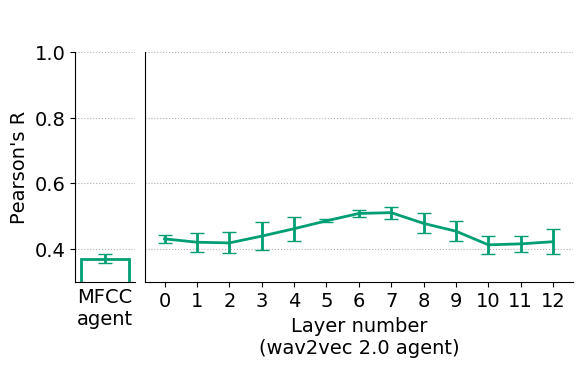

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import math
import pandas as pd

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 14, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':5, 'lines.linewidth':2, 'errorbar.capsize': 5})

cepstrum_color = '#E69F00'
real_art_color = '#0072B2'
learned_art_color = '#009E73'

cm = 1/2.54
# Plot ABX place
fig = plt.figure(figsize=(14.5*cm,9.04*cm), constrained_layout=True)
gs = gridspec.GridSpec(2, 5, figure=fig, height_ratios=[1,10])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1:])
ax_legend = fig.add_subplot(gs[0, :])
ax_legend.axis('off')

# 1. (MFCC agent) Learned articulatory trajectories
keys = 'ave'
Y = np.mean(baseline_cosine['mfcc_agent'][key])
Yerr = np.std(baseline_cosine['mfcc_agent'][key], ddof=1)
X = [0.5]
ax1.bar(X, Y, yerr=Yerr, linewidth=2, color='white', ecolor=learned_art_color, edgecolor=learned_art_color)

# 1. (wav2vec 2.0 agent) Learned articulatory trajectories
key = 'ave'
Y = [np.mean(w2v_cosine[f'ssl_agent_layer_{i}'][key]) for i in range(0,13)]
Yerr = [np.std(w2v_cosine[f'ssl_agent_layer_{i}'][key], ddof=1) for i in range(0,13)]
X = range(0, len(Y))
ax2.errorbar(X, Y, yerr=Yerr, color=learned_art_color)
ax2.set_xticks(X)



# Fashion
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(visible=True, axis='y', linestyle=':', zorder=0)
ax2.grid(visible=True, axis='y', linestyle=':', zorder=0)

ax1.set_xticks([])
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
ax2.set_ylim(0.3, 1)
ax1.set_ylim(0.3, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_ylabel("Pearson's R")
ax2.set_xlabel('Layer number\n(wav2vec 2.0 agent)')
ax1.set_xlabel('MFCC\nagent')
ax1.set_xlim(0, 1)

#plt.savefig('/home/engaclew/agent/out/ssl_agent/pearson_cc_cosine.png', dpi=300)
plt.show()


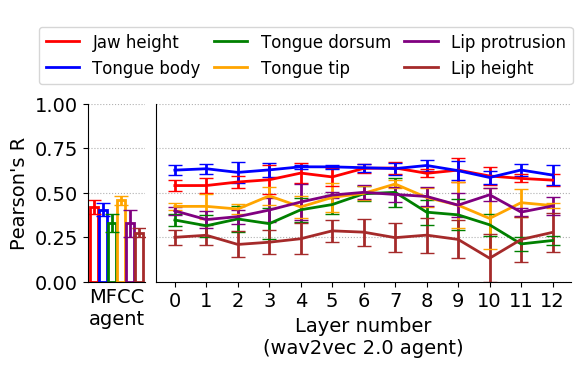

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import math
import pandas as pd

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 14, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':5, 'lines.linewidth':2, 'errorbar.capsize': 5})

cepstrum_color = '#E69F00'
real_art_color = '#0072B2'
learned_art_color = '#009E73'

cm = 1/2.54
# Plot ABX place
fig = plt.figure(figsize=(14.5*cm,9.04*cm), constrained_layout=True)
gs = gridspec.GridSpec(2, 5, figure=fig, height_ratios=[1,10])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1:])
ax_legend = fig.add_subplot(gs[0, :])
ax_legend.axis('off')

# 1. (MFCC agent) Learned articulatory trajectories
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
keys = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
for i, key in enumerate(keys):
    Y = np.mean(baseline_cosine['mfcc_agent'][key])
    Yerr = np.std(baseline_cosine['mfcc_agent'][key], ddof=1)
    X = [0.5+i]
    ax1.bar(X, Y, yerr=Yerr, linewidth=2, color='white', ecolor=colors[i], edgecolor=colors[i], label=key)

# 1. (wav2vec 2.0 agent) Learned articulatory trajectories
keys = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
for i, key in enumerate(keys):
    Y = [np.mean(w2v_cosine[f'ssl_agent_layer_{i}'][key]) for i in range(0,13)]
    Yerr = [np.std(w2v_cosine[f'ssl_agent_layer_{i}'][key], ddof=1) for i in range(0,13)]
    X = range(0, len(Y))
    ax2.errorbar(X, Y, yerr=Yerr, label=key, color=colors[i])
    ax2.set_xticks(X)



# Fashion
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(visible=True, axis='y', linestyle=':', zorder=0)
ax2.grid(visible=True, axis='y', linestyle=':', zorder=0)

ax1.set_xticks([])
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
ax2.set_ylim(0, 1)
ax1.set_ylim(0, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_ylabel("Pearson's R")
ax2.set_xlabel('Layer number\n(wav2vec 2.0 agent)')
ax1.set_xlabel('MFCC\nagent')

legend_elements = [
    plt.Line2D([0], [0], color=colors[0], lw=2, label='Jaw height'),
    plt.Line2D([0], [0], color=colors[1], lw=2, label='Tongue body'),
    plt.Line2D([0], [0], color=colors[2], lw=2, label='Tongue dorsum'),
    plt.Line2D([0], [0], color=colors[3], lw=2, label='Tongue tip'),
    plt.Line2D([0], [0], color=colors[4], lw=2, label='Lip protrusion'),
    plt.Line2D([0], [0], color=colors[5], lw=2, label='Lip height')
]

ax_legend.legend(handles=legend_elements, bbox_to_anchor=(1.02, 0.5), ncol=3, fontsize=12, columnspacing=.8)
#plt.savefig('/home/engaclew/agent/out/ssl_agent/pearson_cc_cosine.png', dpi=300)
plt.show()


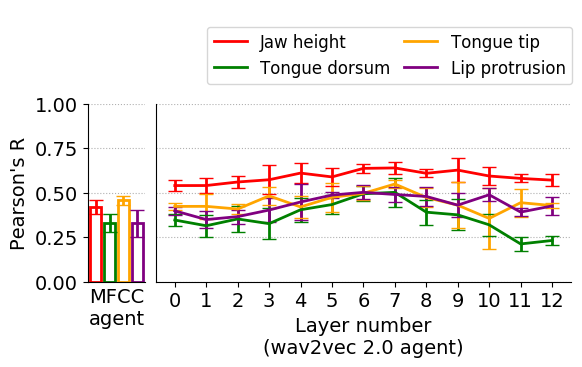

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import math
import pandas as pd

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 14, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':5, 'lines.linewidth':2, 'errorbar.capsize': 5})

cepstrum_color = '#E69F00'
real_art_color = '#0072B2'
learned_art_color = '#009E73'

cm = 1/2.54
# Plot ABX place
fig = plt.figure(figsize=(14.5*cm,9.04*cm), constrained_layout=True)
gs = gridspec.GridSpec(2, 5, figure=fig, height_ratios=[1,10])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1:])
ax_legend = fig.add_subplot(gs[0, :])
ax_legend.axis('off')

# 1. (MFCC agent) Learned articulatory trajectories
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
keys = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
j = 0
for i, key in enumerate(keys):
    Y = np.mean(baseline_cosine['mfcc_agent'][key])
    Yerr = np.std(baseline_cosine['mfcc_agent'][key], ddof=1)
    X = [0.5+j]
    if key in ['JH', 'TD', 'TT',  'LP']:
        ax1.bar(X, Y, yerr=Yerr, linewidth=2, color='white', ecolor=colors[i], edgecolor=colors[i], label=key)
        j += 1

# 1. (wav2vec 2.0 agent) Learned articulatory trajectories
keys = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
for i, key in enumerate(keys):
    Y = [np.mean(w2v_cosine[f'ssl_agent_layer_{i}'][key]) for i in range(0,13)]
    Yerr = [np.std(w2v_cosine[f'ssl_agent_layer_{i}'][key], ddof=1) for i in range(0,13)]
    X = range(0, len(Y))
    if key in ['JH', 'TD', 'TT',  'LP']:
        ax2.errorbar(X, Y, yerr=Yerr, label=key, color=colors[i])
ax2.set_xticks(X)



# Fashion
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(visible=True, axis='y', linestyle=':', zorder=0)
ax2.grid(visible=True, axis='y', linestyle=':', zorder=0)

ax1.set_xticks([])
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
ax2.set_ylim(0, 1)
ax1.set_ylim(0, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_ylabel("Pearson's R")
ax2.set_xlabel('Layer number\n(wav2vec 2.0 agent)')
ax1.set_xlabel('MFCC\nagent')

['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
legend_elements = [
    plt.Line2D([0], [0], color=colors[0], lw=2, label='Jaw height'),
    plt.Line2D([0], [0], color=colors[2], lw=2, label='Tongue dorsum'),
    plt.Line2D([0], [0], color=colors[3], lw=2, label='Tongue tip'),
    plt.Line2D([0], [0], color=colors[4], lw=2, label='Lip protrusion')
]

ax_legend.legend(handles=legend_elements, bbox_to_anchor=(1.02, 0.5), ncol=2, fontsize=12, columnspacing=.8)
#plt.savefig('/home/engaclew/agent/out/ssl_agent/pearson_cc_cosine.png', dpi=300)
plt.show()